In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv


In [43]:
import math
import numpy as np
import pandas as pd
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import  Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense, Dropout,GRU
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
data = pd.read_csv("../input/tesla-stock-price/Tesla.csv - Tesla.csv.csv",index_col='Date', parse_dates=True)

In [4]:
data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996


In [5]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


# ***we will work on closing price ***

In [6]:
close_data = data.iloc[:, 3:4]

In [7]:
close_data

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2017-03-13,246.169998
2017-03-14,258.000000
2017-03-15,255.729996


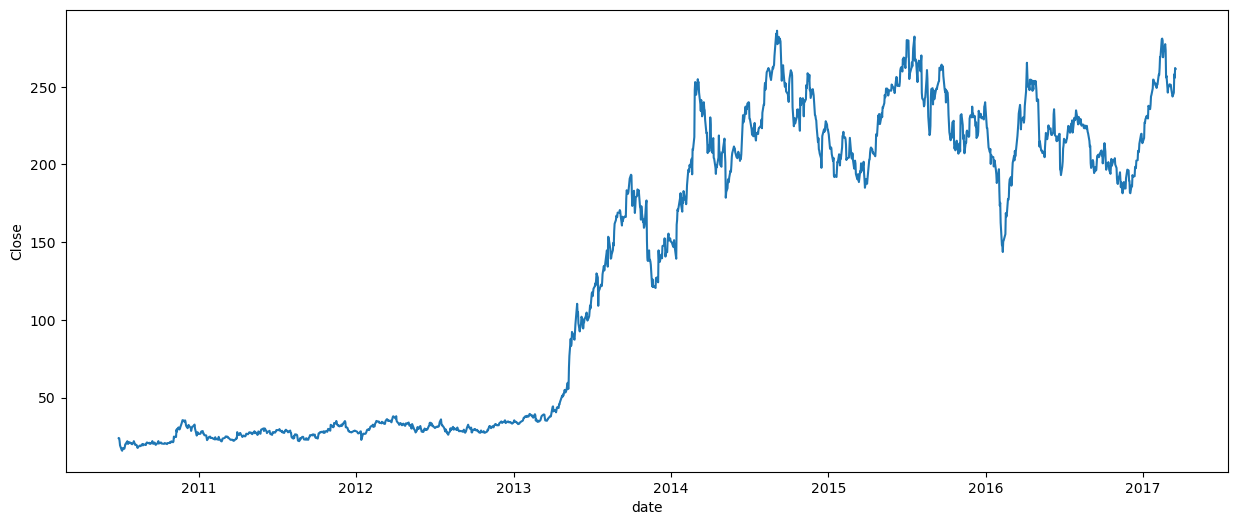

In [8]:
# Plot the data
plt.plot(close_data)
plt.xlabel('date')
plt.ylabel('Close')
plt.show()

In [52]:
# Apply the Augmented Dickey-Fuller test
result = adfuller(close_data['Close'])

# Print the test statistic and p-value
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.813733
p-value: 0.815055


p value >0.05 so we try differencing the data

ADF Statistic: -0.813733
p-value: 0.815055
ADF Statistic: -39.848280
p-value: 0.000000
ADF Statistic: -14.448064
p-value: 0.000000


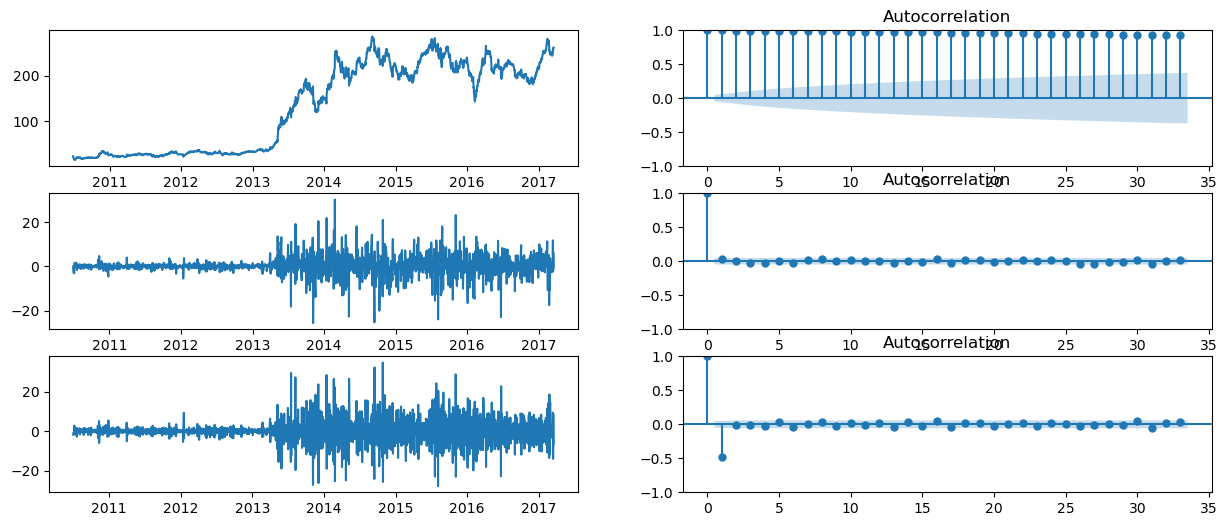

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf


# Apply differencing to the data


# Create a grid of subplots
fig, axes = plt.subplots(3, 2)
 
# Plot the autocorrelation function for the differenced data three times
df=close_data
for i in range(3):
    axes[i,0].plot(df) 
    plot_acf(df['Close'], ax=axes[i,1])
    # Apply the Augmented Dickey-Fuller test
    result = adfuller(df['Close'])
    # Print the test statistic and p-value
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    df = df.diff().dropna()

plt.show()


****with difference equal to 1 the data become stationary****

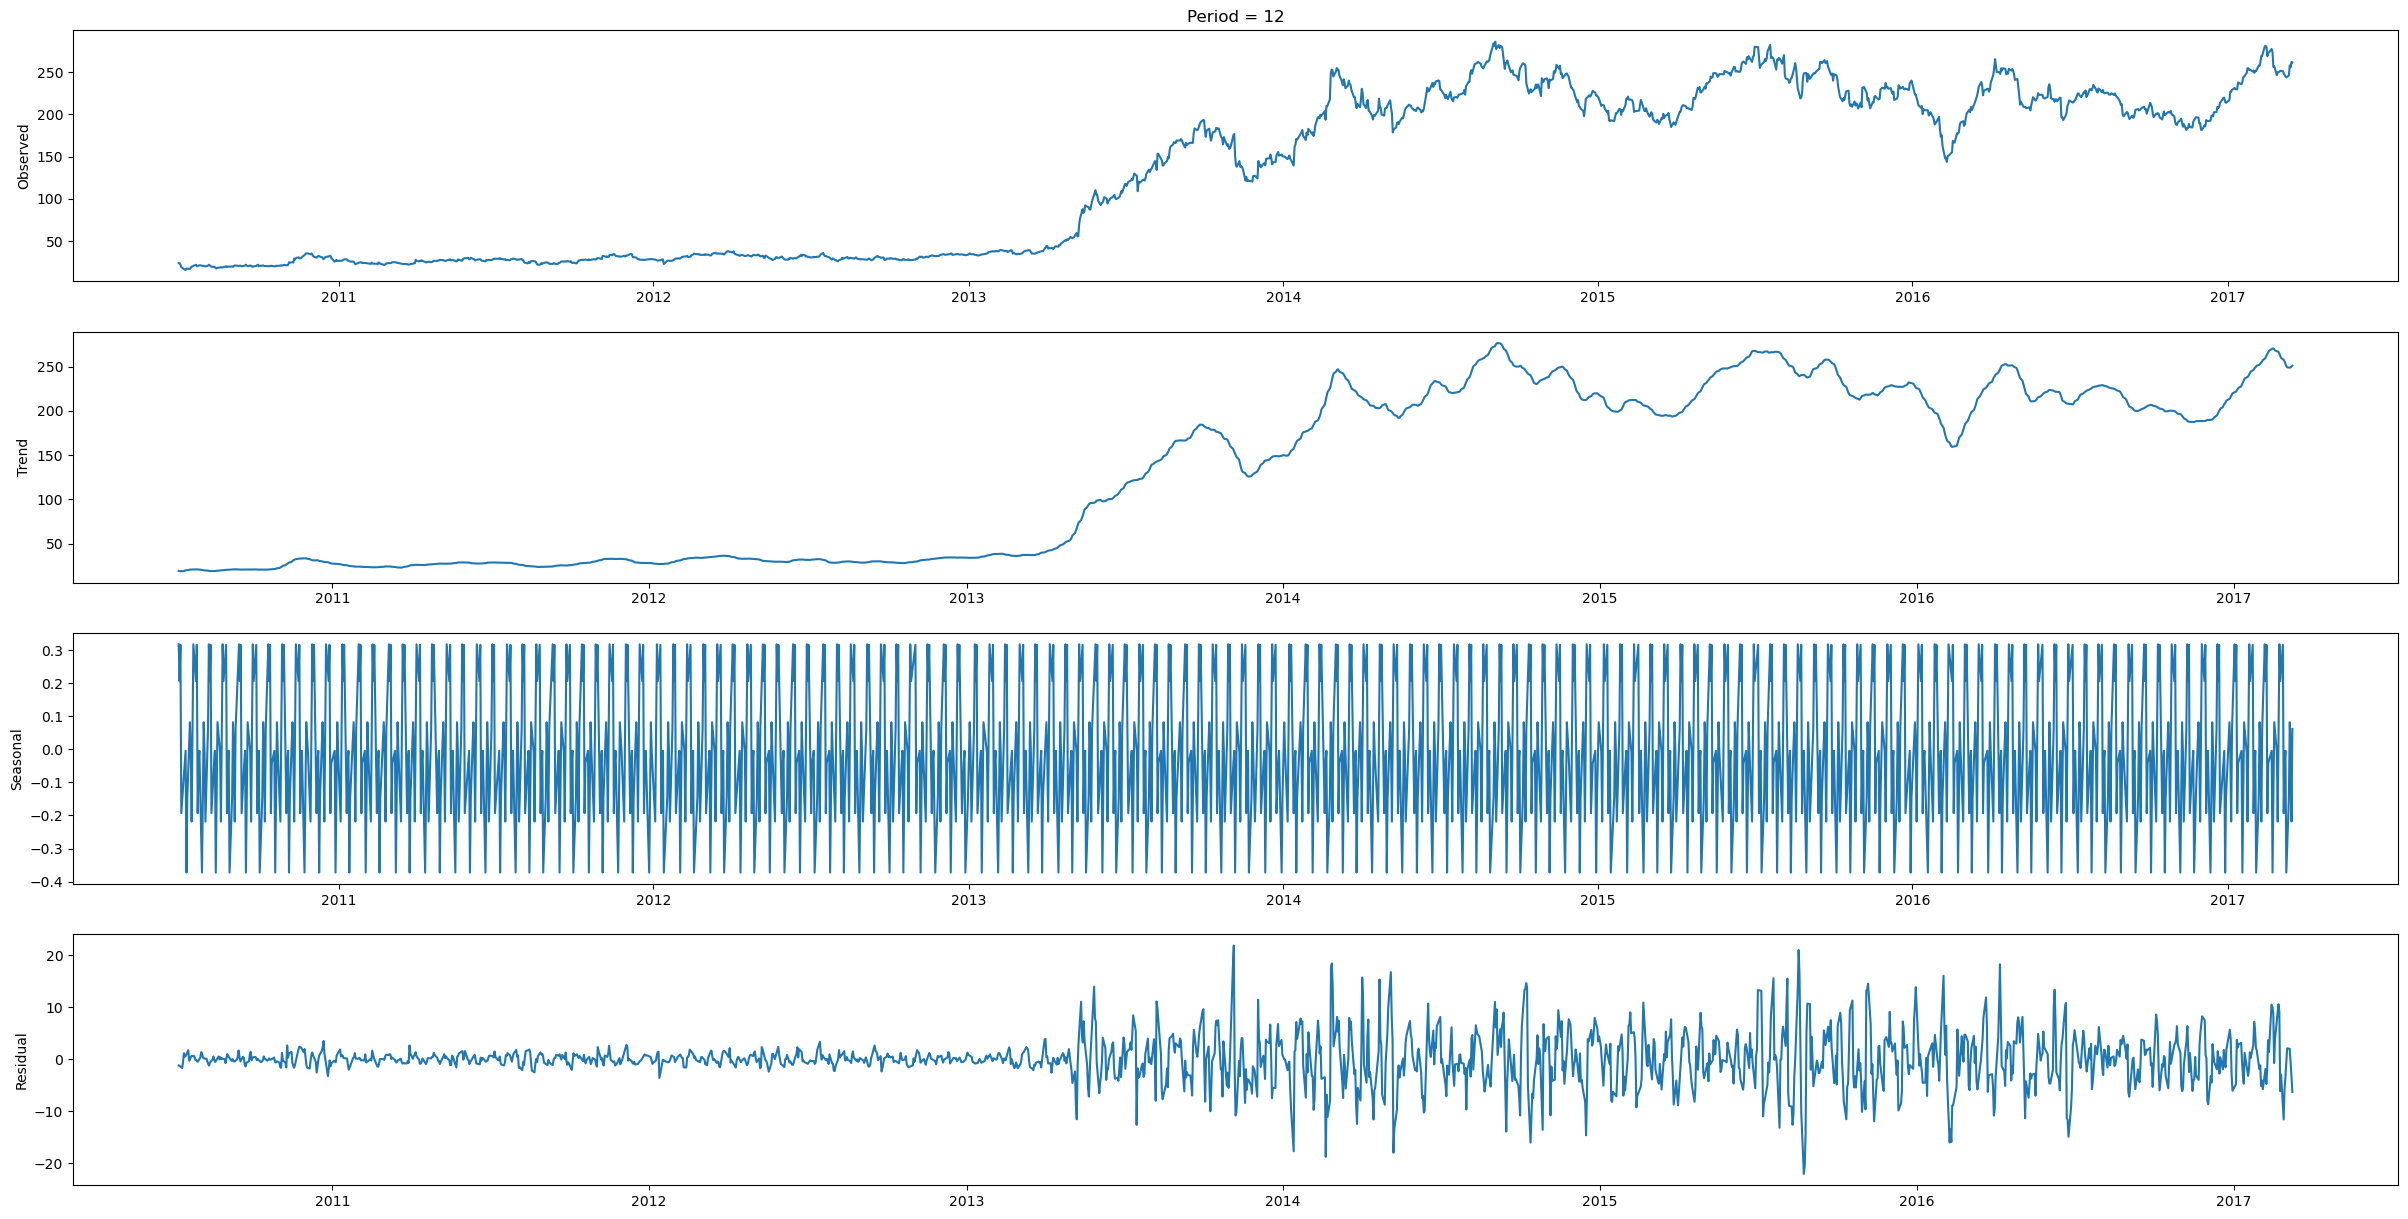

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Create a list of period values to use
periods = [12]

# Create a figure with 4 subplots arranged in a single row
fig, axes = plt.subplots(nrows=4, ncols=len(periods), figsize=(30, 15))

# Loop over the period values
for i, period in enumerate(periods):
    # Decompose the time series data into trend, seasonal, and residual components
    decomposition = seasonal_decompose(close_data, period=period)
    
    # Plot the observed data on the first row of subplots
    axes[0].plot(decomposition.observed)
    axes[0].set_title(f'Period = {period}')
    
    # Plot the trend component on the second row of subplots
    axes[1].plot(decomposition.trend)
    
    # Plot the seasonal component on the third row of subplots
    axes[2].plot(decomposition.seasonal)
    
    # Plot the residual component on the fourth row of subplots
    axes[3].plot(decomposition.resid)

# Set the titles for each row of subplots
axes[0].set_ylabel('Observed')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonal')
axes[3].set_ylabel('Residual')

# Display the figure
plt.show()


In [34]:
# Apply the Ljung-Box test
ljung_box_results = acorr_ljungbox(close_data['Close'])

# Print ljung_box_results
print('ljung_box_results:', ljung_box_results)

if len(ljung_box_results) > 0:
    print('Ljung-Box test statistics:', ljung_box_results[0])
    print('p-values:', ljung_box_results[1])
else:
    print('ljung_box_results is empty')


ljung_box_results:          lb_stat  lb_pvalue
1    1688.128238        0.0
2    3370.143218        0.0
3    5046.187770        0.0
4    6716.296180        0.0
5    8380.932812        0.0
6   10040.097643        0.0
7   11694.008483        0.0
8   13342.488433        0.0
9   14985.196881        0.0
10  16622.045496        0.0


KeyError: 0

In [145]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
def sarima_model(X, seasonal_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    # Seasonal - fit stepwise auto-ARIMA
    smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

    smodel.summary()
    predictions ,confint = smodel.predict(n_periods=len(test), return_conf_int=True)
    r2 = r2_score(test, predictions)
    return r2,test,predictions,smodel


In [146]:
ariama_data=close_data.iloc[:close_data.shape[0]-30,:]
r2,test, arima_predictions,arima_model = sarima_model(ariama_data['Close'],(1,1,1,12))




Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=10.76 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=8605.610, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6359.854, Time=2.99 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=7644.376, Time=3.53 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=8640.795, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=6715.417, Time=0.18 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6257.974, Time=9.14 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=19.09 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=12.99 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=8601.662, Time=7.65 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=6259.974, Time=11.43 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=6259.974, Time=11.71 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=7645.009, Time=8.56 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=6261.966, Time=13.72 sec
 ARIMA(1,0,0)(2,1,0)[12]    

In [149]:
arima_predictions

1096    234.034048
1097    241.837708
1098    245.122447
1099    247.172185
1100    246.635735
           ...    
1657    227.181145
1658    229.654699
1659    228.745068
1660    224.832523
1661    231.683513
Length: 566, dtype: float64

In [150]:
r2

-0.2032079318749671

# ARIMA predection for the next 60 days

In [166]:
def arima_predict(res_set,arima_model,steps):
    predictions = list(arima_model.predict(n_periods=steps))
    r2 = r2_score(res_set, predictions)
    return predictions, r2


In [167]:
res_set=close_data.iloc[-30:,:]

In [168]:
predections,r2=arima_predict(res_set,arima_model,30)

In [169]:
r2

-4.275450282732088

# ARIMA & LSTM hybrid model 

In [170]:
n_steps=20
train_size = int(len(ariama_data) * 0.66)
l=ariama_data[:train_size]
l=l[-n_steps+1:]
l=l['Close']
l=l.tolist()
a=arima_predictions.tolist()
arp=l+a


In [171]:
len(arp)

585

In [172]:
arima_predictions

1096    234.034048
1097    241.837708
1098    245.122447
1099    247.172185
1100    246.635735
           ...    
1657    227.181145
1658    229.654699
1659    228.745068
1660    224.832523
1661    231.683513
Length: 566, dtype: float64

In [173]:
# Prepare data for LSTM model
def prepare_data(x, y, n_steps):
    X, Y = [], []
    for i in range(len(x) - n_steps):
        seq_x = x[i:i+n_steps]
        seq_y = y[i]
        X.append(seq_x)
        Y.append(seq_y)
    return np.array(X), np.array(Y)



X_train, y_train = prepare_data(arp,test,n_steps)

In [174]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ReduceLROnPlateau
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

# Define LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu',return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(64))

model.add(Dense(70))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')




In [175]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=6, verbose=1,min_lr=1e-9)

In [180]:
# Fit LSTM model
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
18/18 [==============================] - 1s 41ms/step - loss: 591.0182
Epoch 2/30
18/18 [==============================] - 1s 35ms/step - loss: 592.6319
Epoch 3/30
18/18 [==============================] - 1s 34ms/step - loss: 595.7684
Epoch 4/30
18/18 [==============================] - 1s 34ms/step - loss: 594.4898
Epoch 5/30
18/18 [==============================] - 1s 34ms/step - loss: 592.1878
Epoch 6/30
18/18 [==============================] - 1s 36ms/step - loss: 593.1077
Epoch 7/30
18/18 [==============================] - 1s 33ms/step - loss: 601.8242
Epoch 8/30
18/18 [==============================] - 1s 35ms/step - loss: 597.3497
Epoch 9/30
18/18 [==============================] - 1s 34ms/step - loss: 591.1365
Epoch 10/30
18/18 [==============================] - 1s 35ms/step - loss: 594.4203
Epoch 11/30
18/18 [==============================] - 1s 34ms/step - loss: 594.8995
Epoch 12/30
18/18 [==============================] - 1s 34ms/step - loss: 593.9075
Epoch 13/30
1

In [177]:

# Make predictions with LSTM model
history = arp[-n_steps:]
lstm_predictions = []
for i in range(len(predections)):
    x_input = np.array(history[-n_steps:])
    x_input = x_input.reshape((1, n_steps, n_features))
    x_input = x_input.astype('float32')
    yhat = model.predict(x_input,verbose=0)[0][0]
    lstm_predictions.append(yhat)
    history.append(predections[i])


In [178]:
r2 = r2_score(res_set, lstm_predictions)

In [179]:
r2

-10.497995045915559